### Importing Libraries and the Dataset

In [368]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [369]:
df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

### Initial Exploration

In [370]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [372]:
category_cols = [
    'MSZoning',
    'Street',
    'Alley',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
    'LandSlope',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'ExterQual',
    'ExterCond',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Heating',
    'HeatingQC',
    'CentralAir',
    'Electrical',
    'KitchenQual',
    'Functional',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'PoolQC',
    'Fence',
    'MiscFeature',
    'SaleType',
    'SaleCondition']

In [373]:
numeric_cols = [
    'MSSubClass',
    'LotFrontage',
    'LotArea',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'MoSold',
    'YrSold',
    'SalePrice']

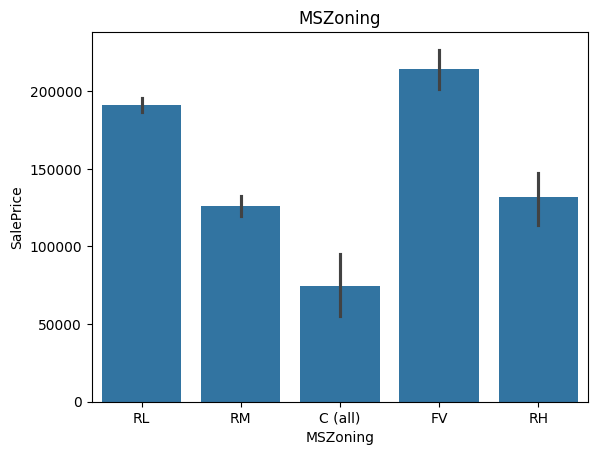

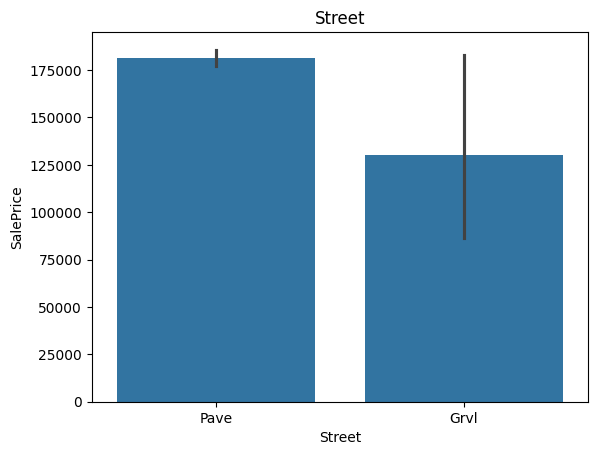

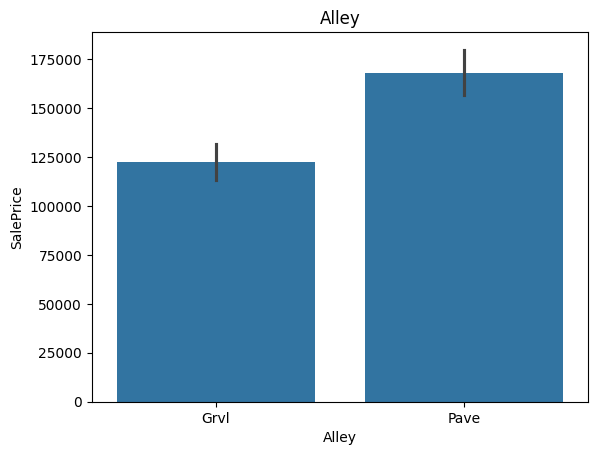

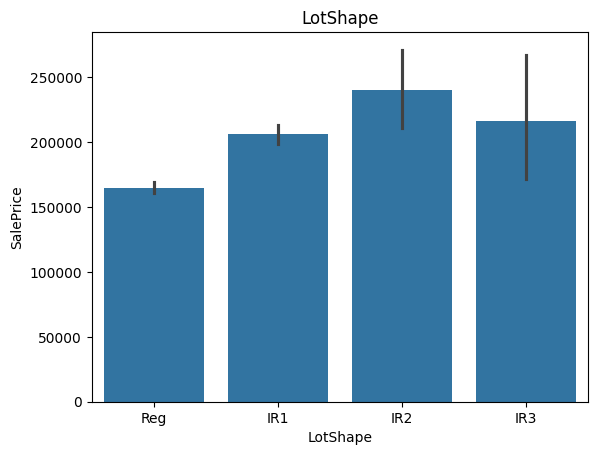

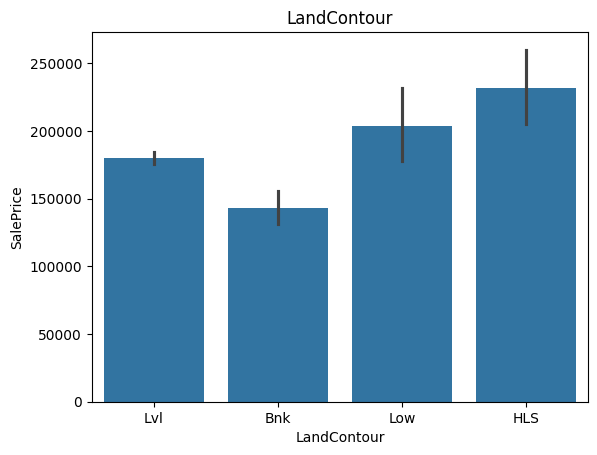

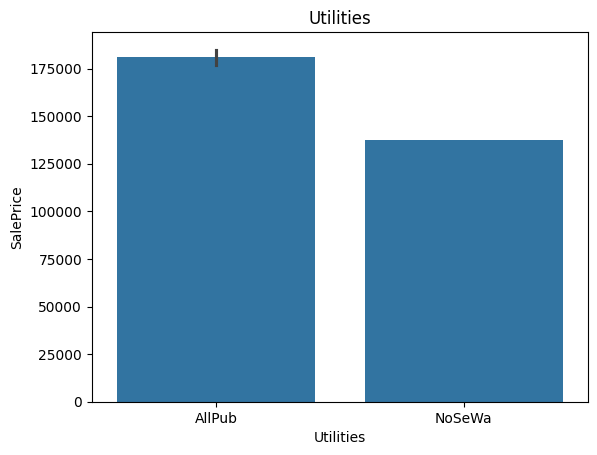

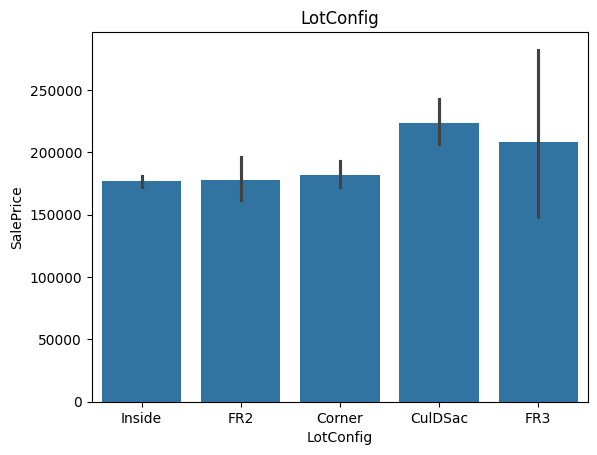

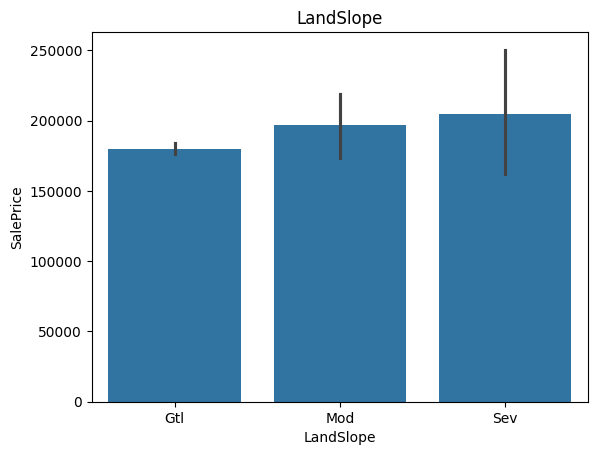

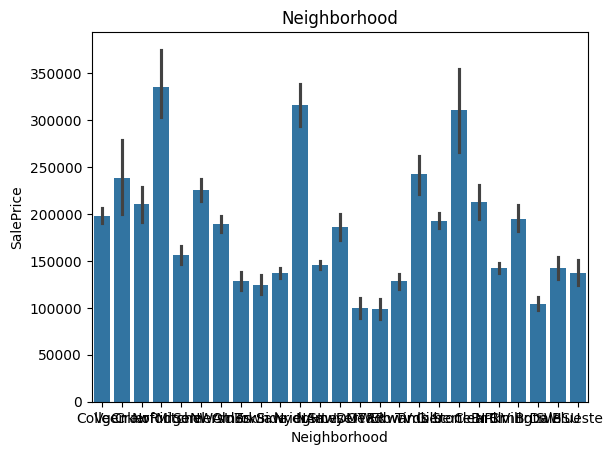

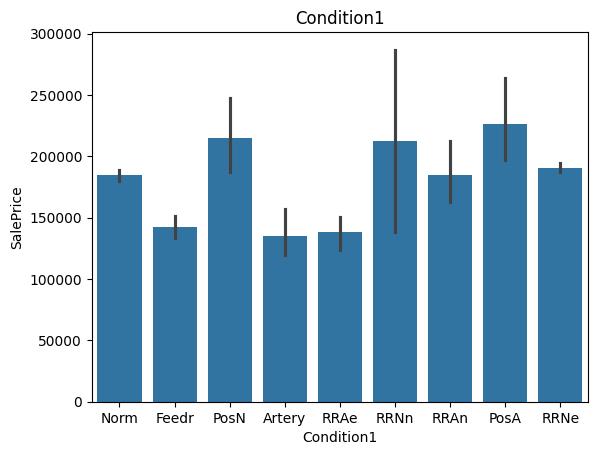

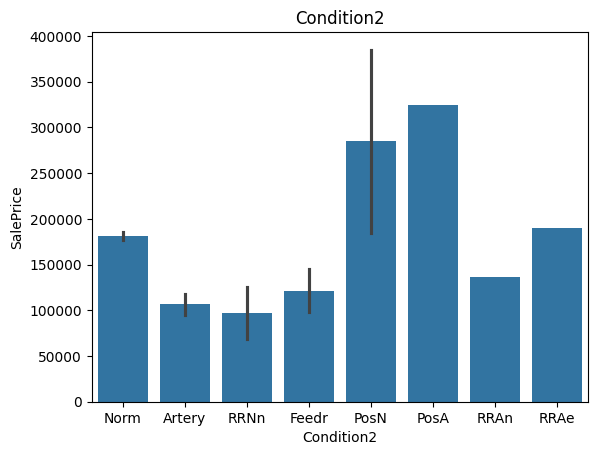

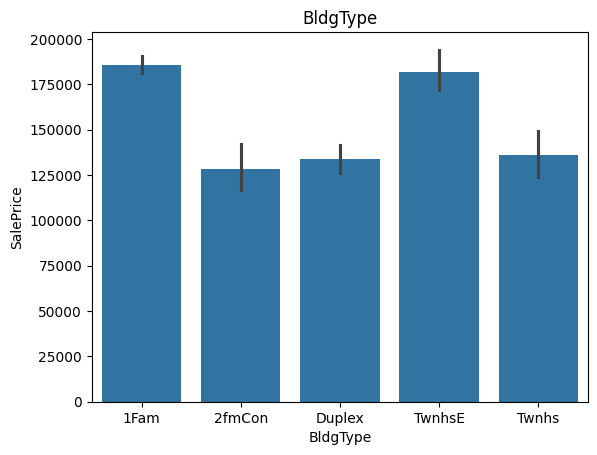

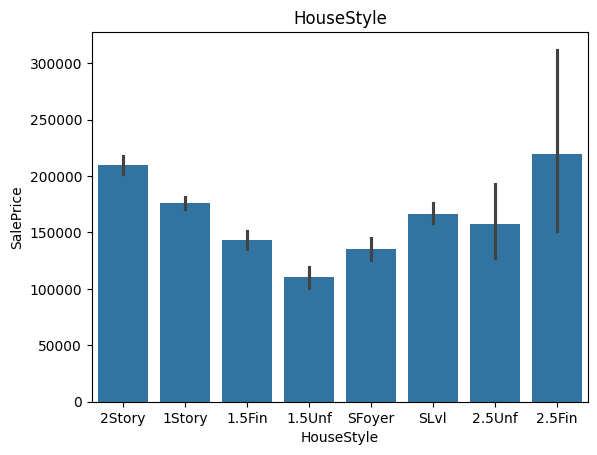

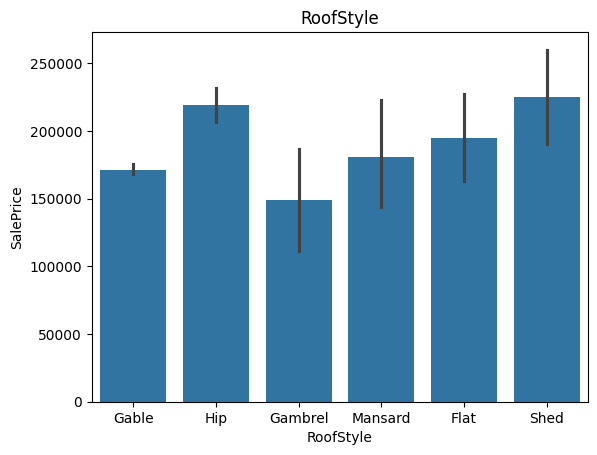

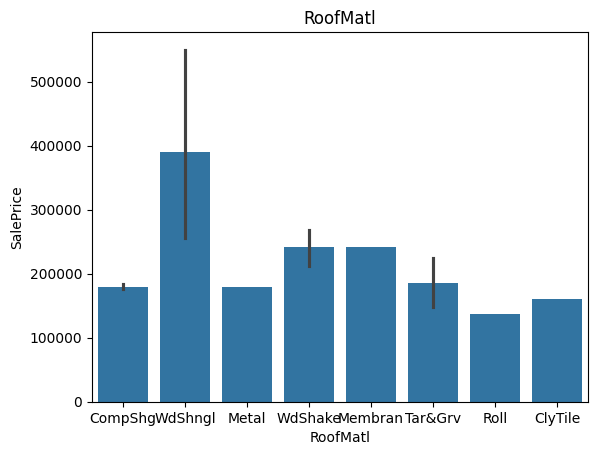

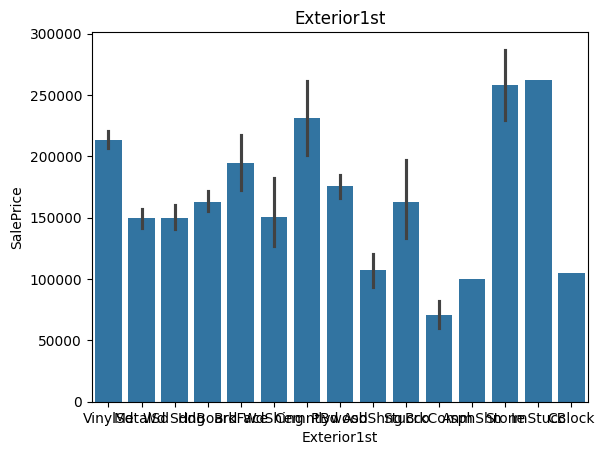

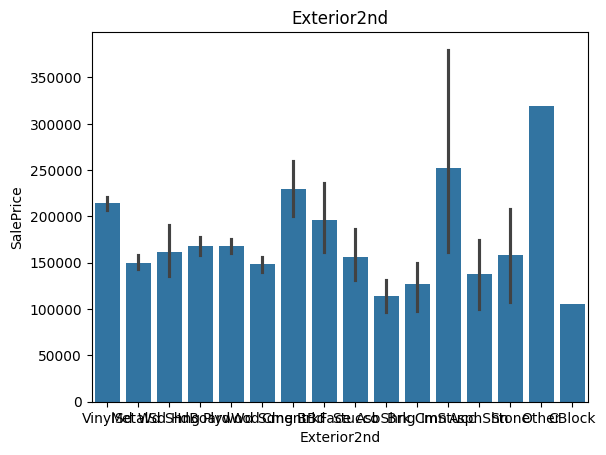

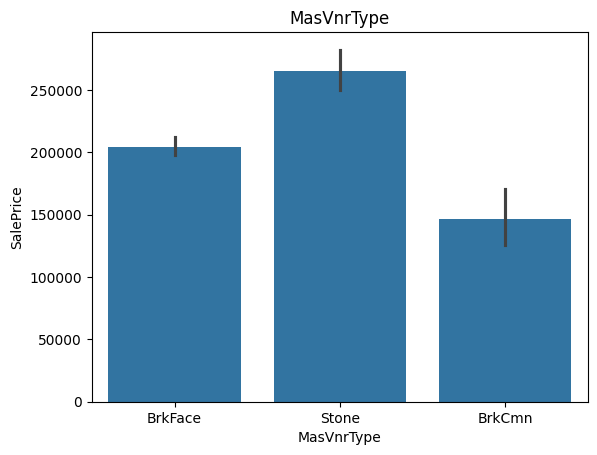

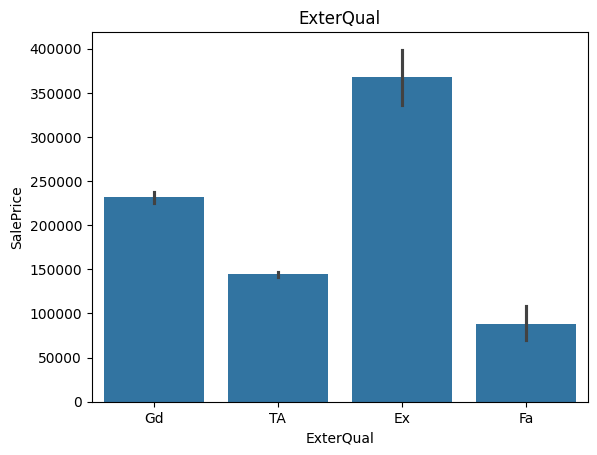

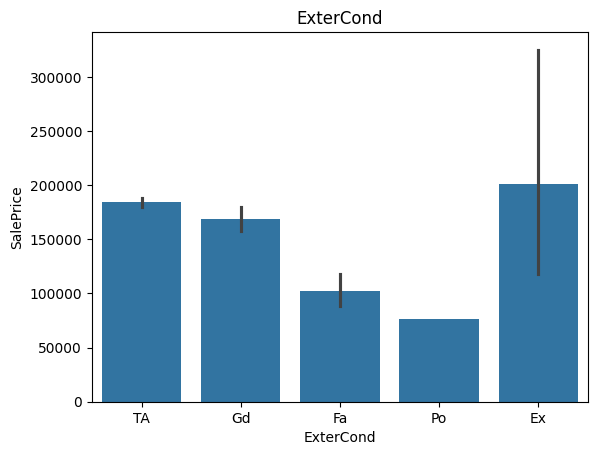

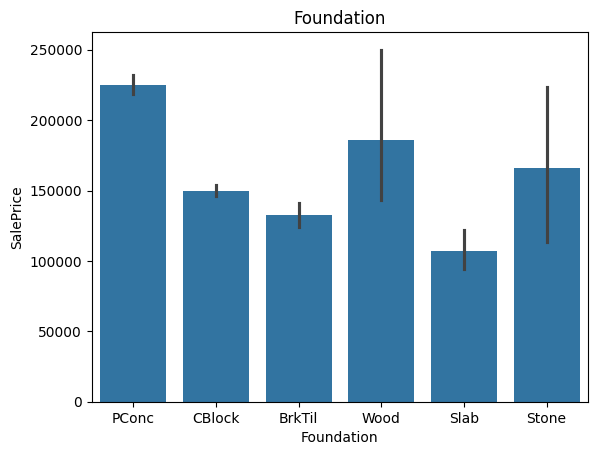

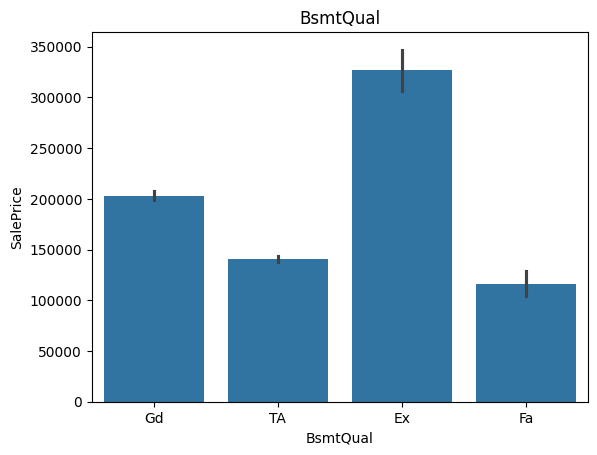

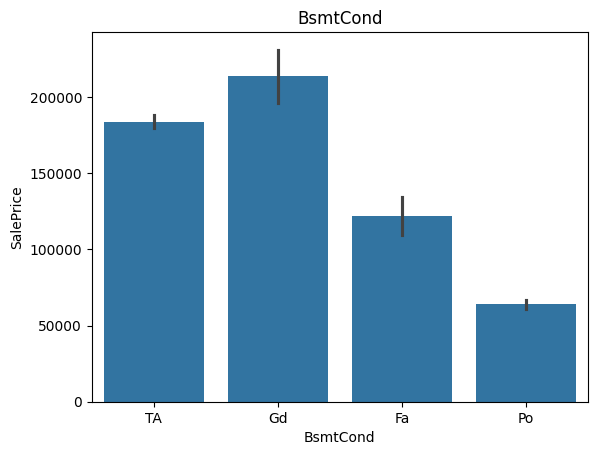

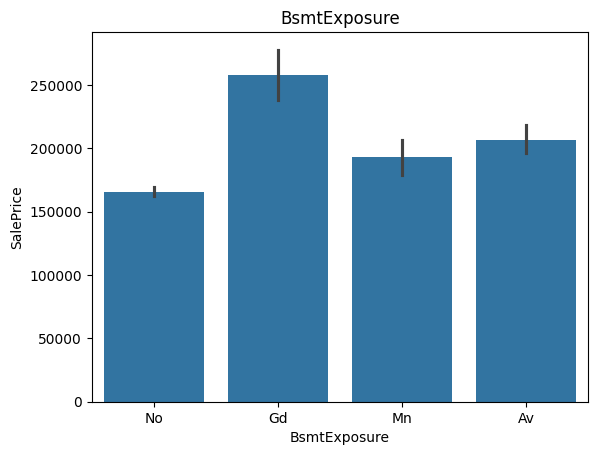

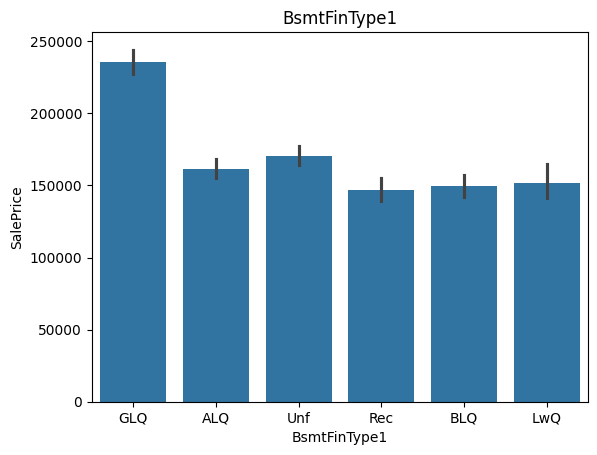

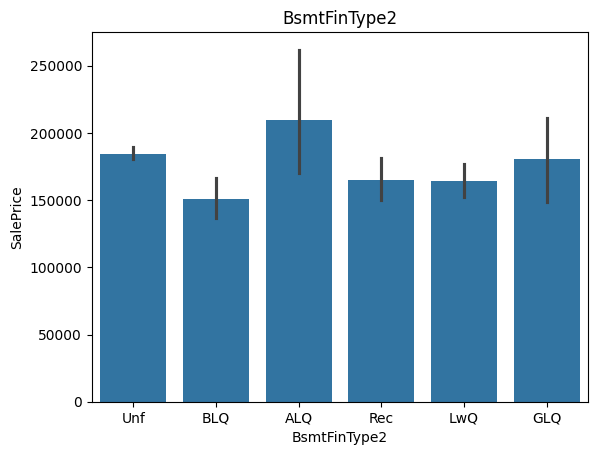

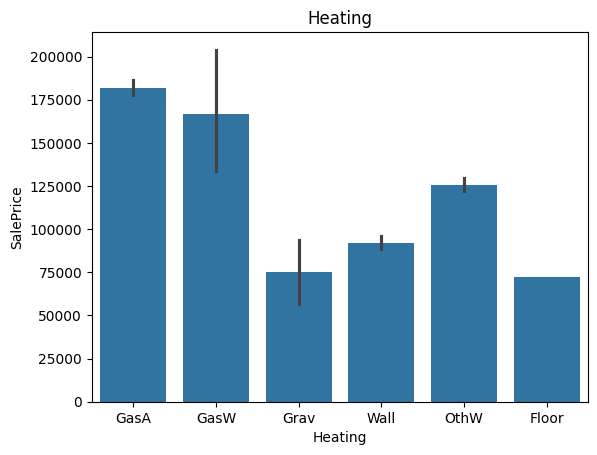

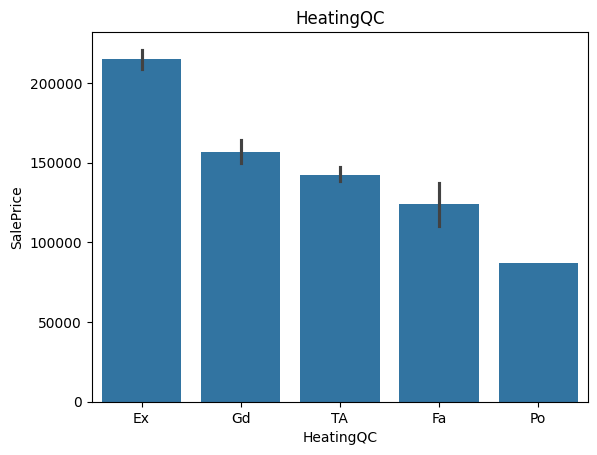

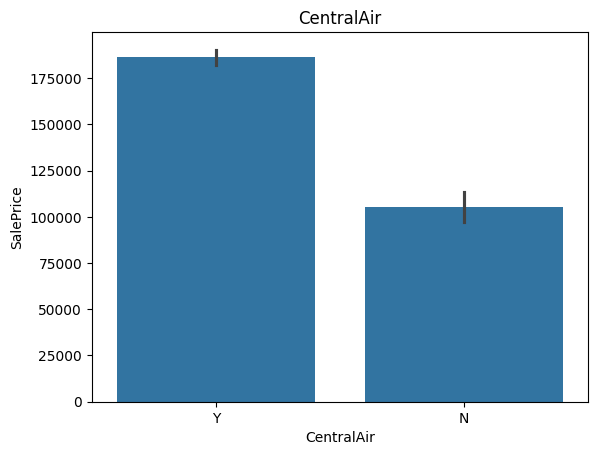

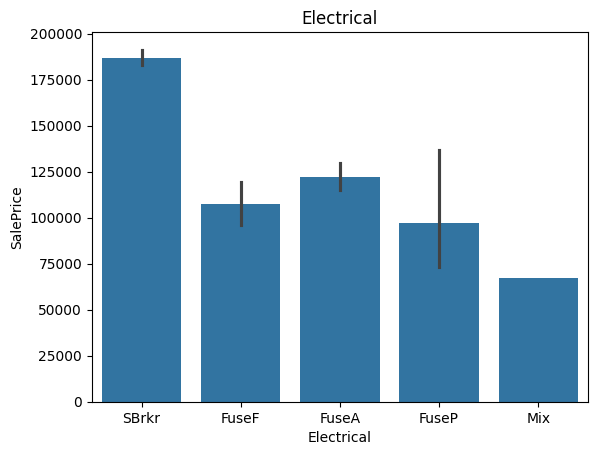

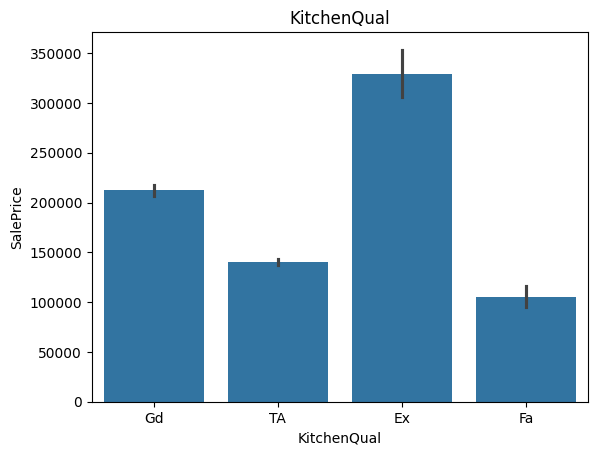

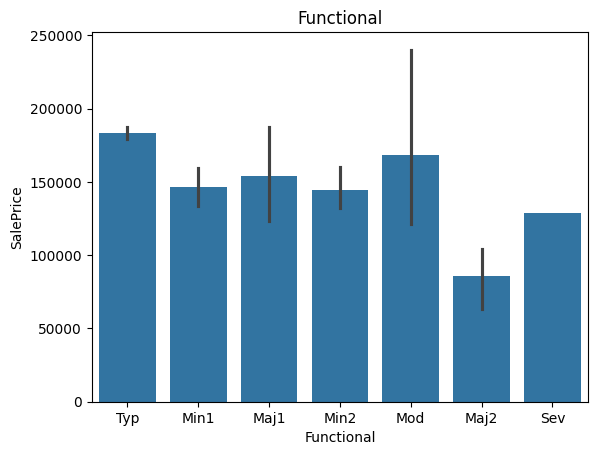

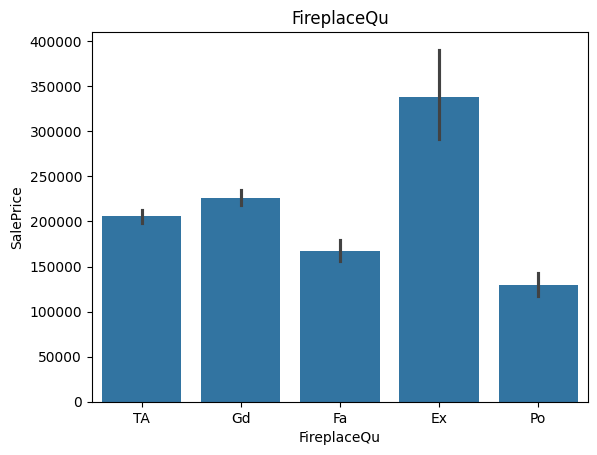

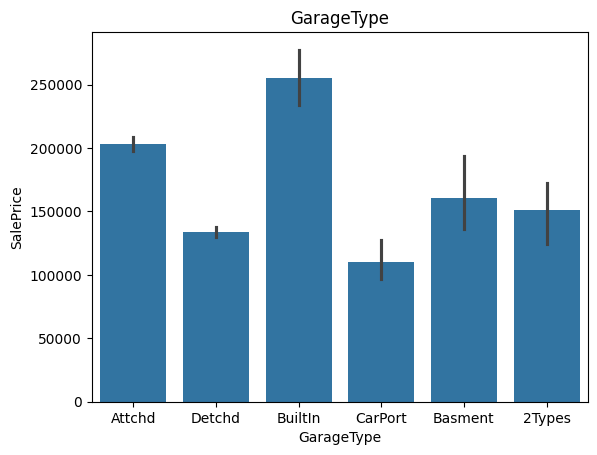

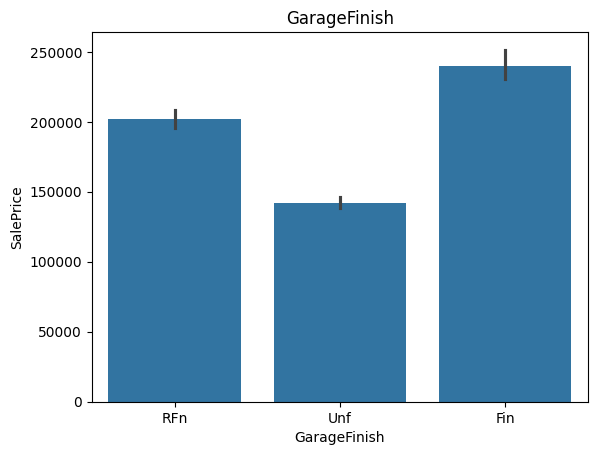

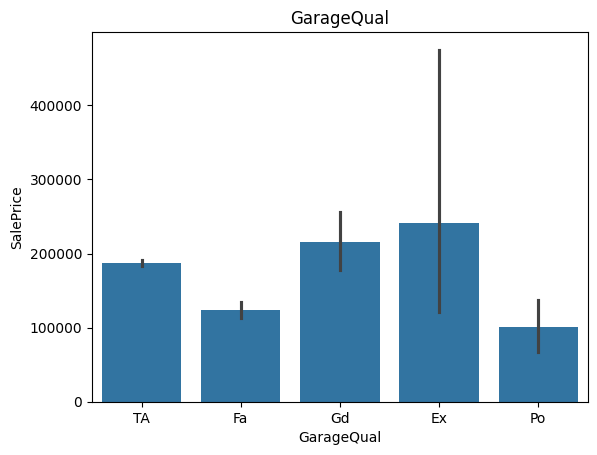

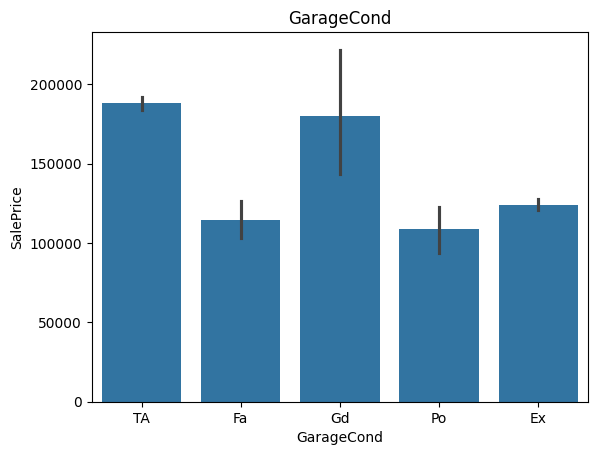

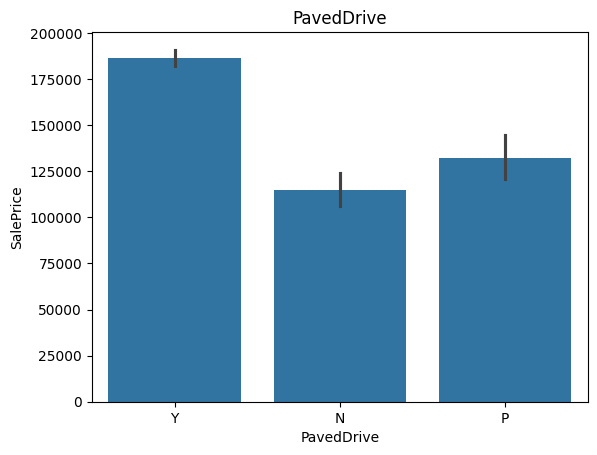

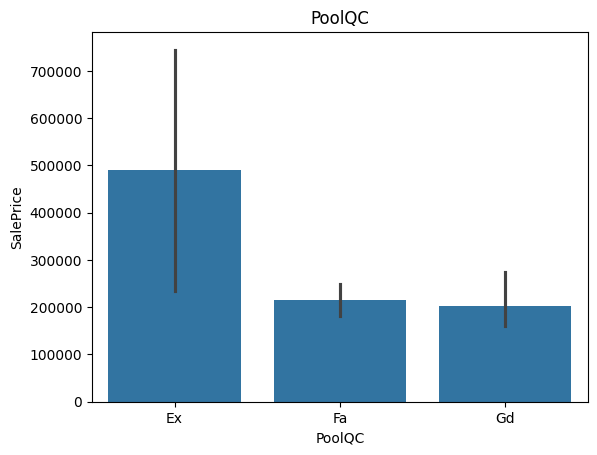

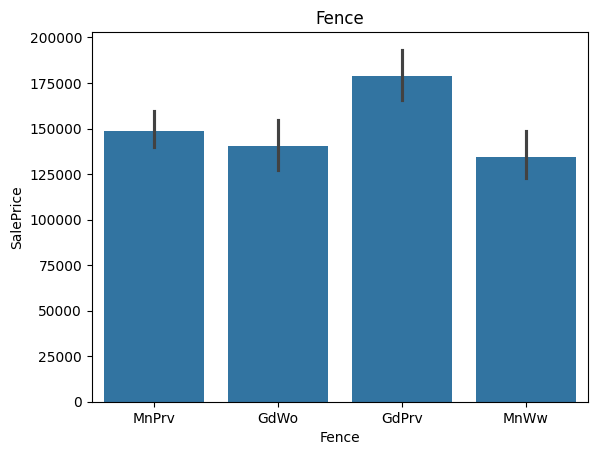

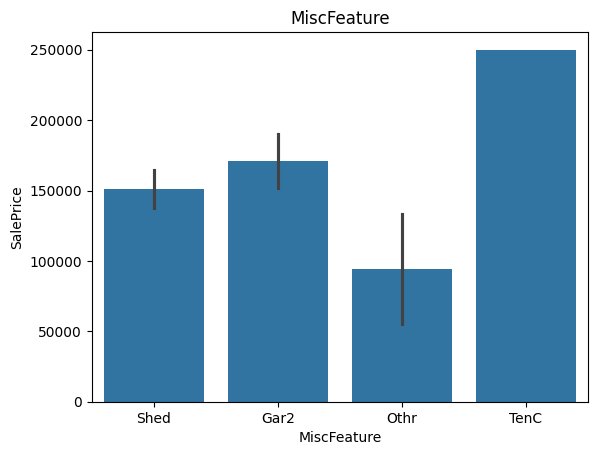

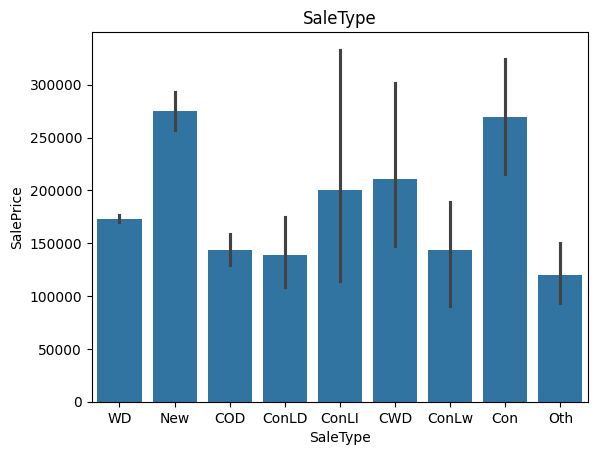

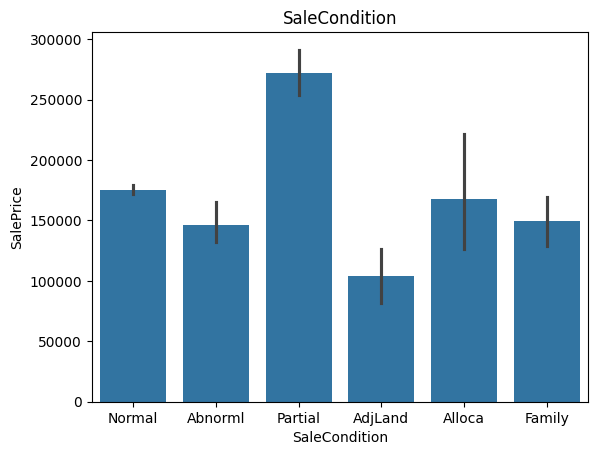

In [374]:
for col in category_cols:
    plt.title(col)
    sns.barplot(data=df, x=col, y='SalePrice')
    plt.show()

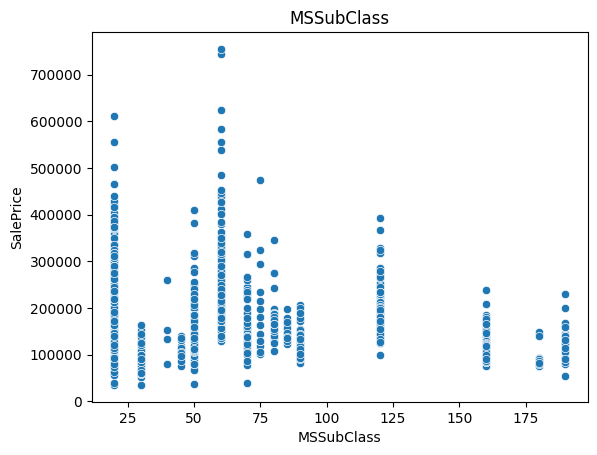

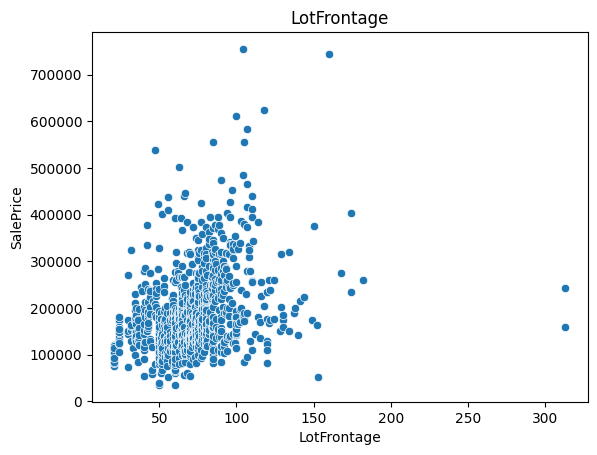

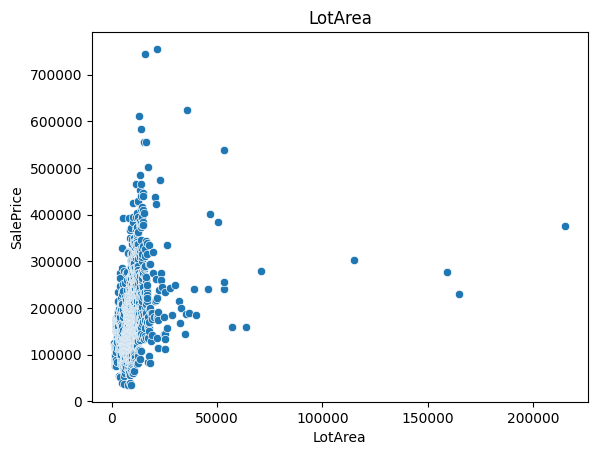

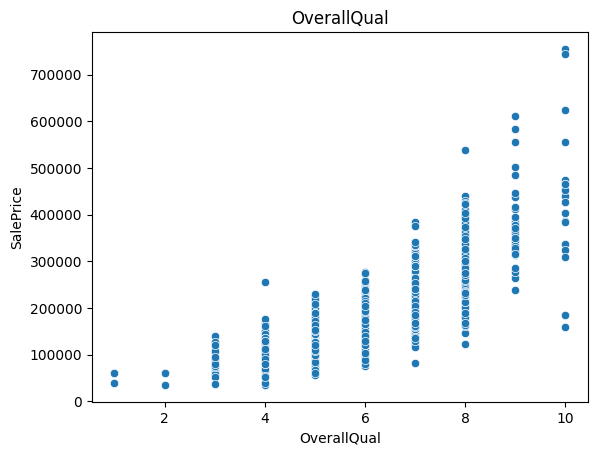

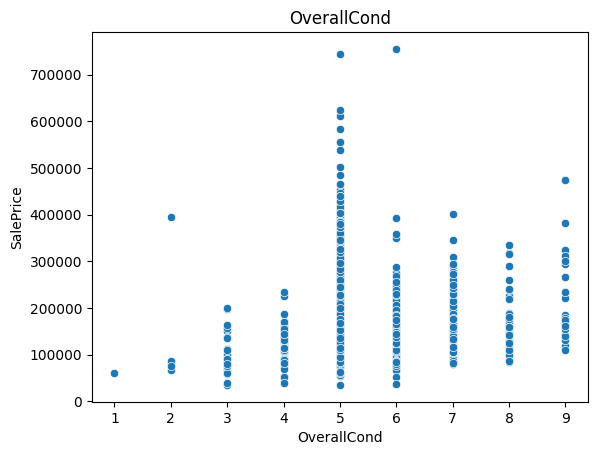

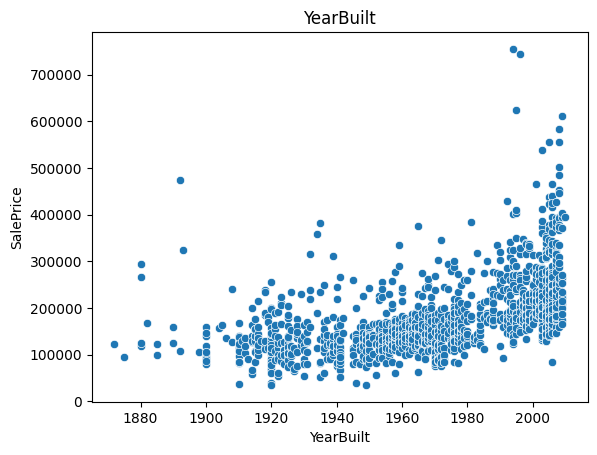

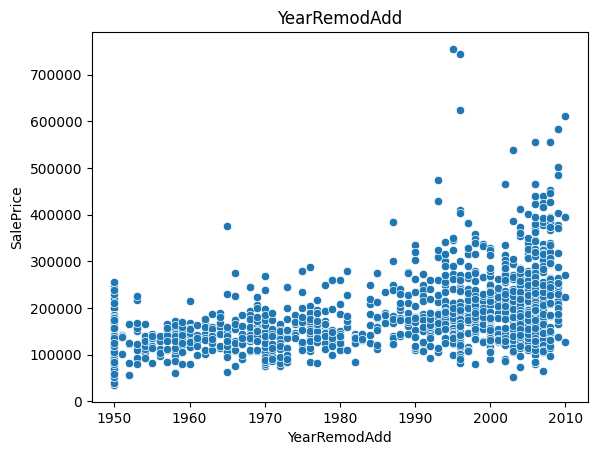

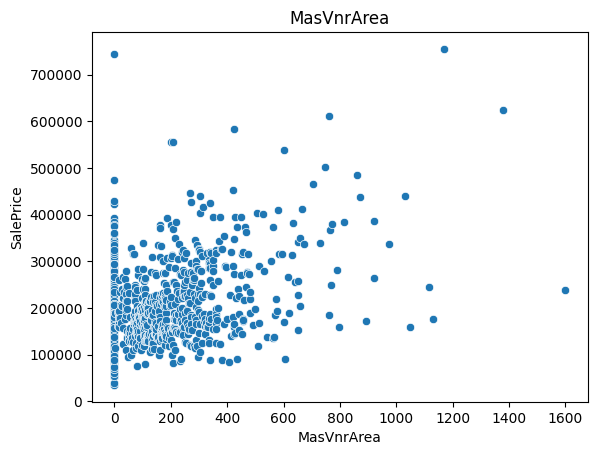

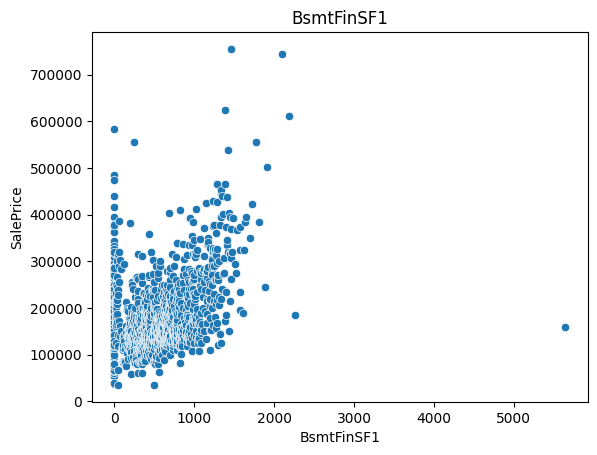

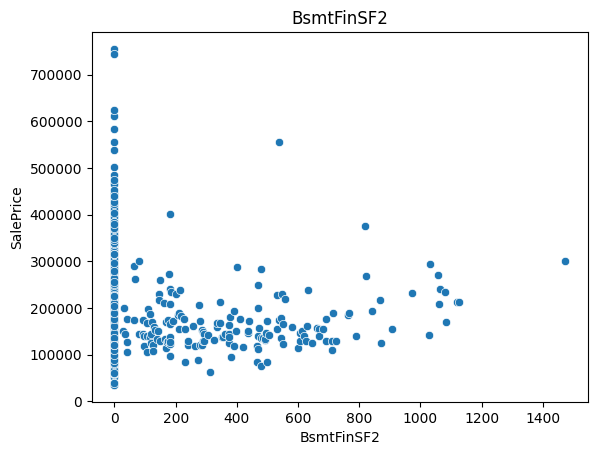

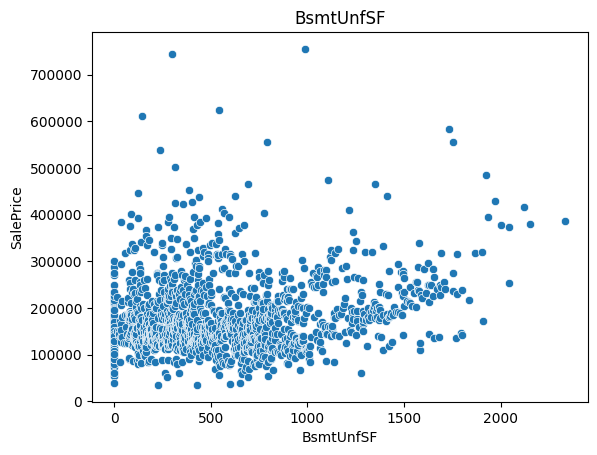

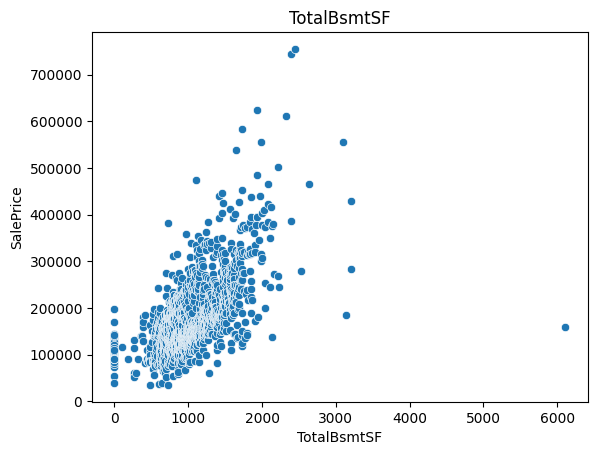

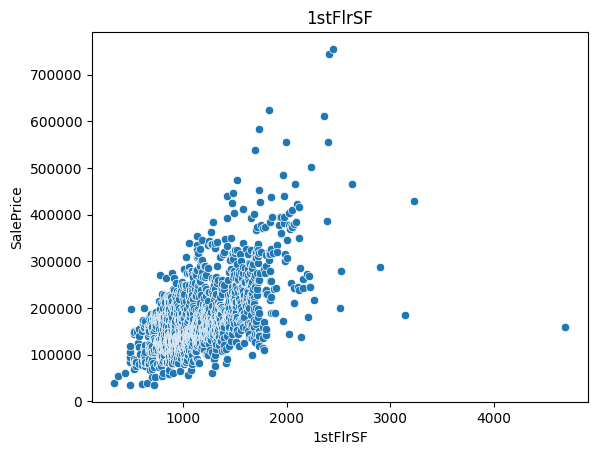

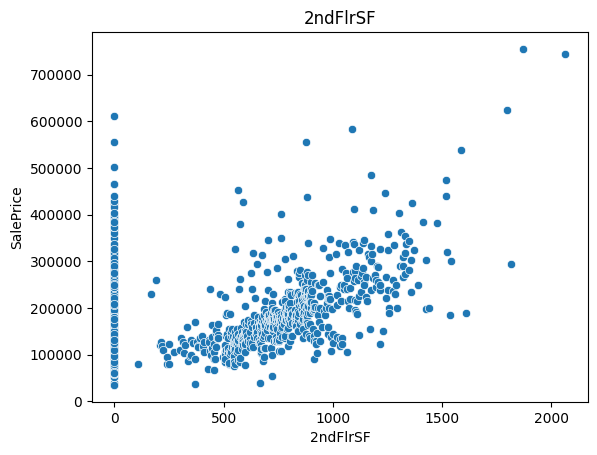

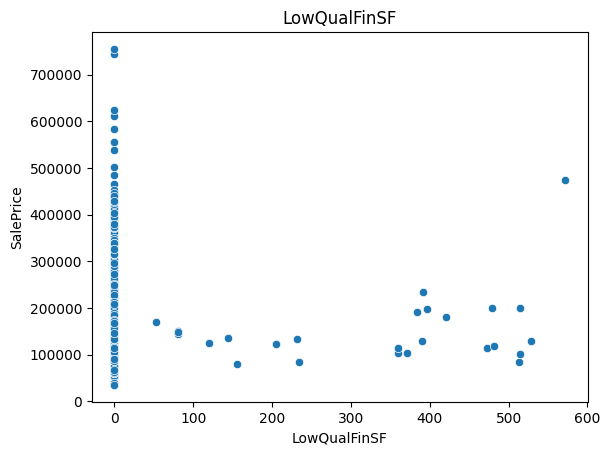

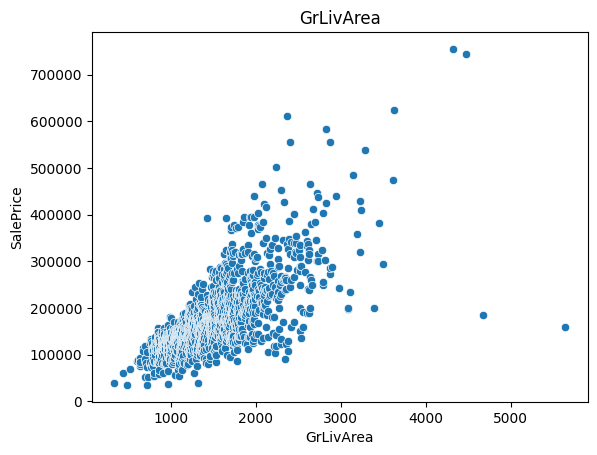

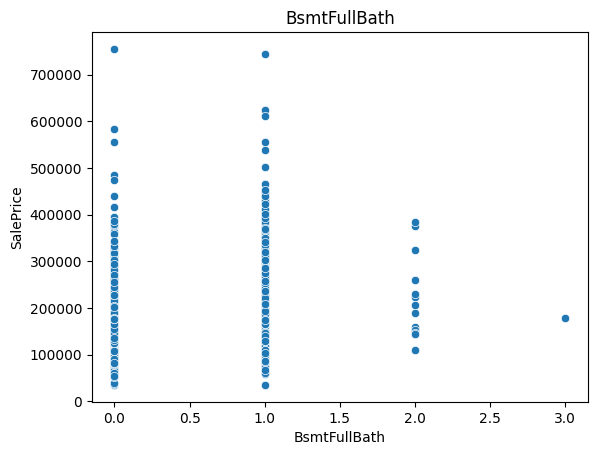

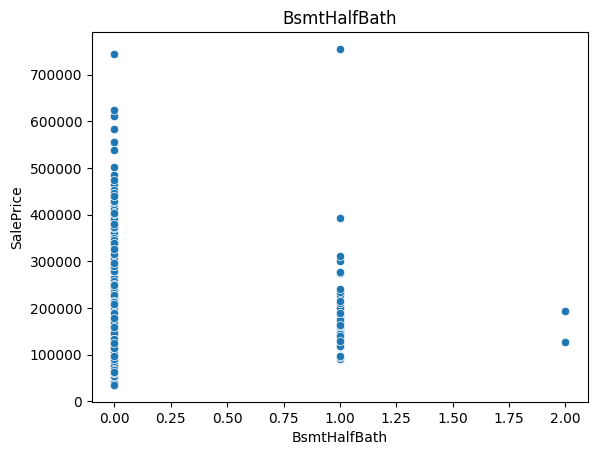

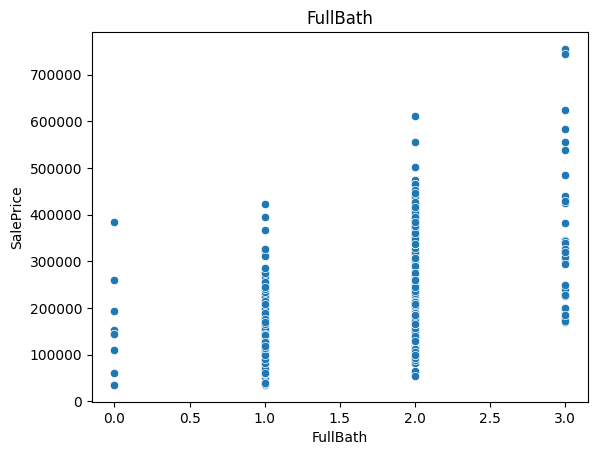

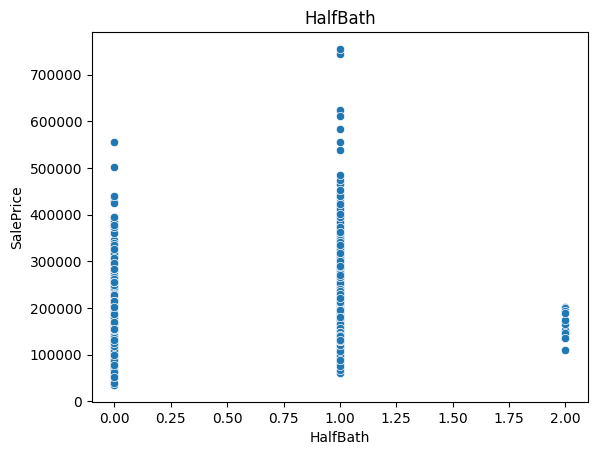

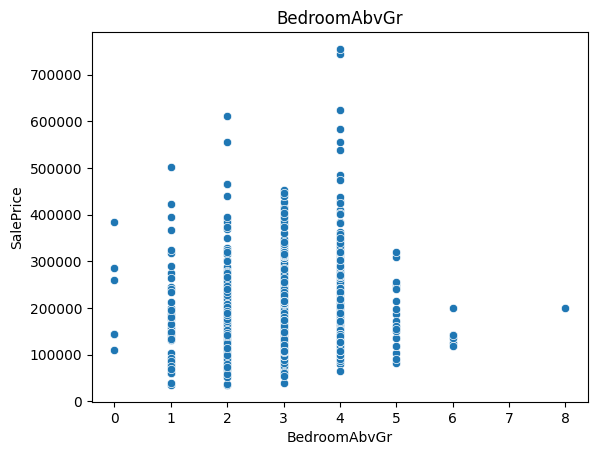

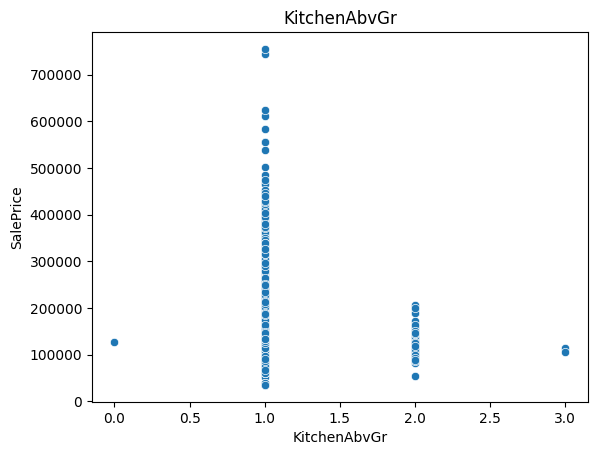

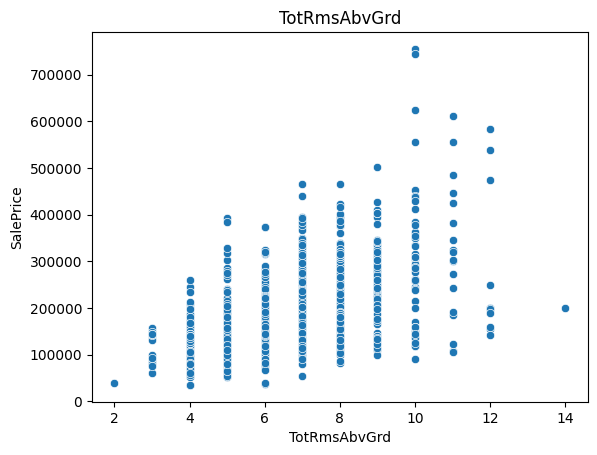

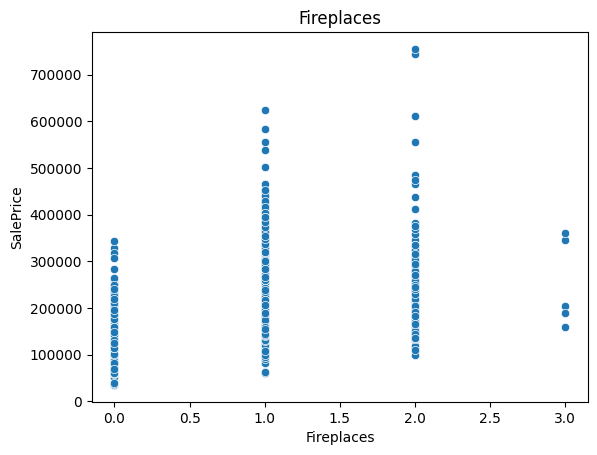

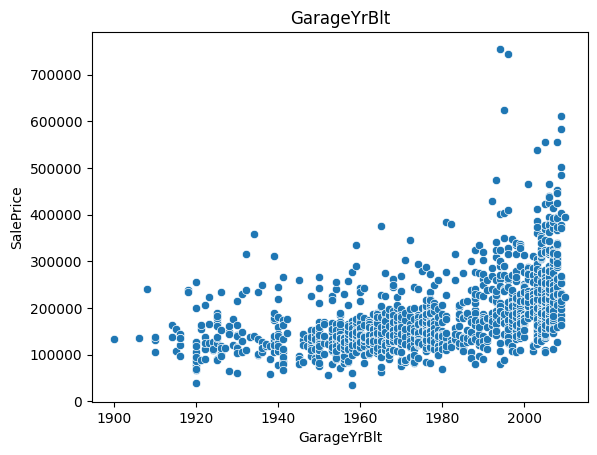

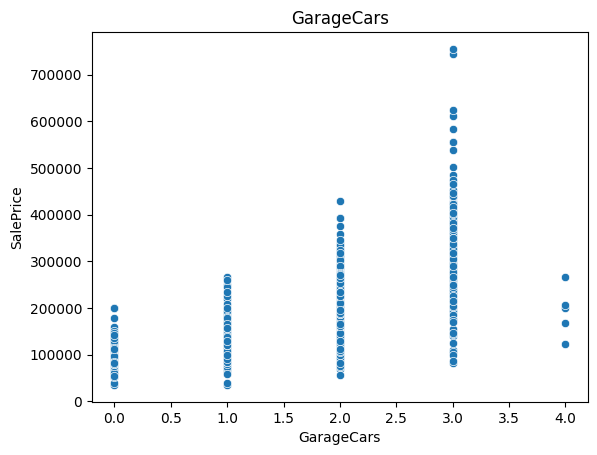

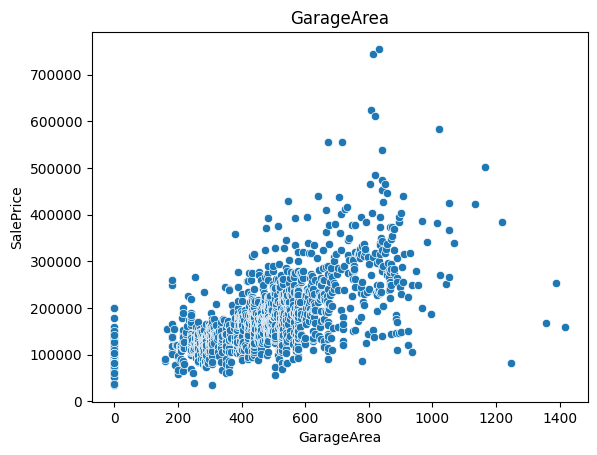

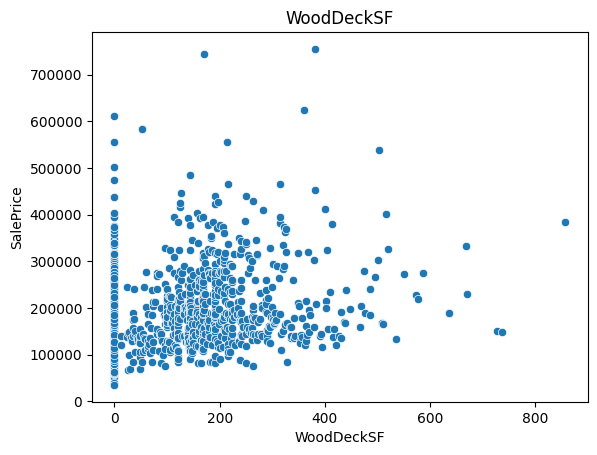

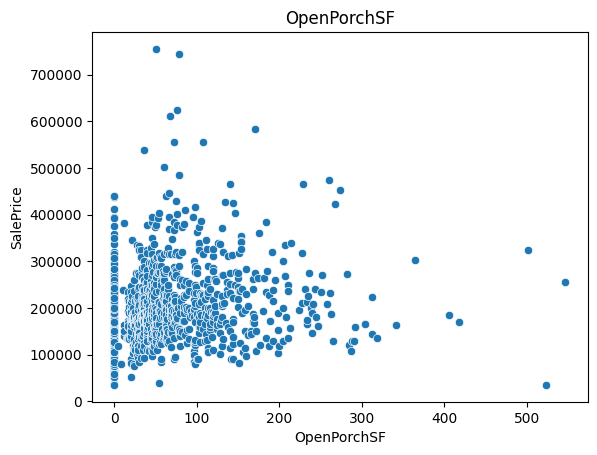

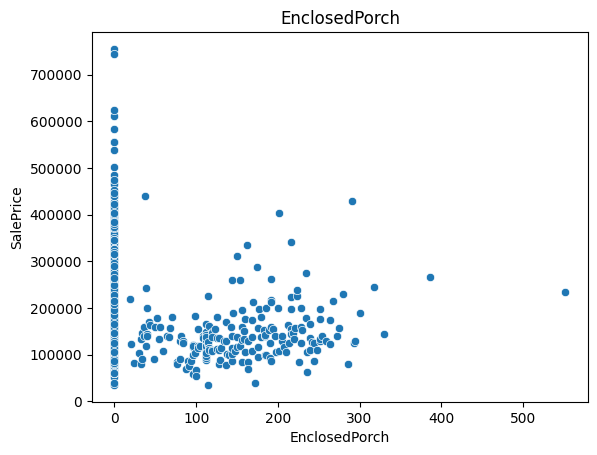

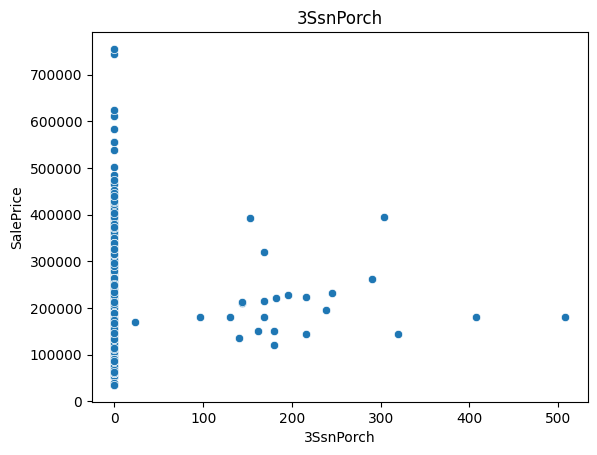

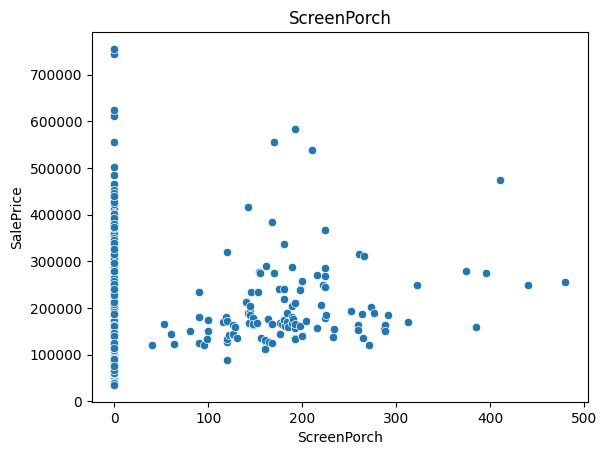

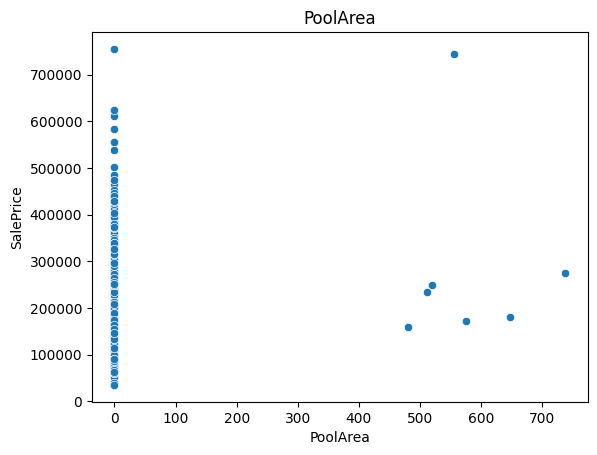

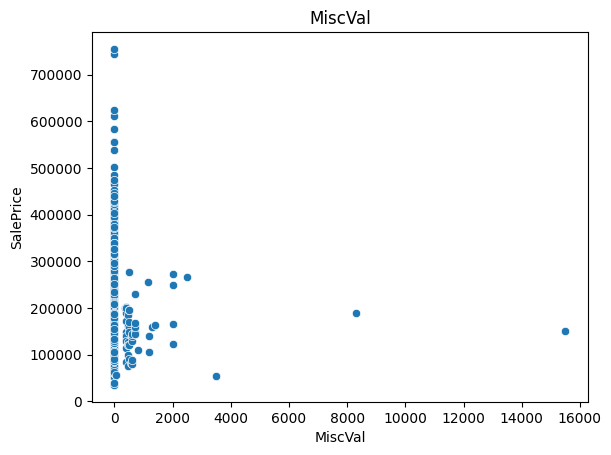

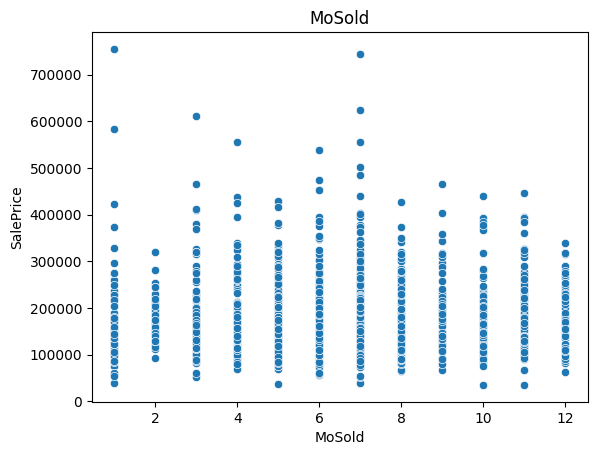

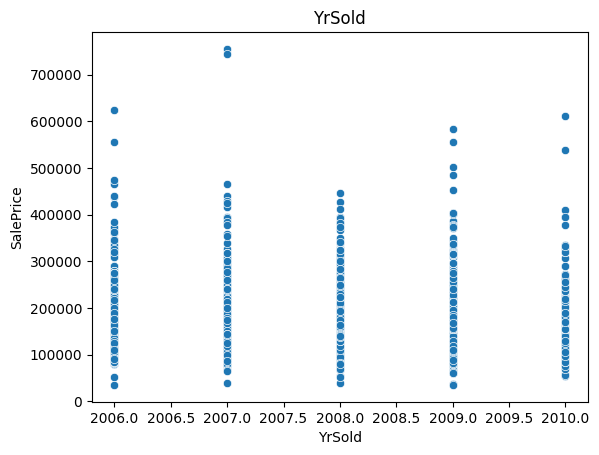

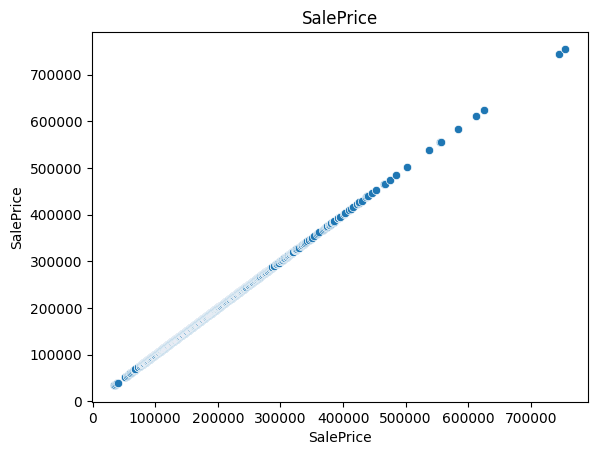

In [375]:
for col in numeric_cols:
    df_sorted = df.sort_values(col)
    plt.title(col)
    sns.scatterplot(data=df_sorted, x=col, y='SalePrice')
    plt.show()


### Handle missing values

<Axes: >

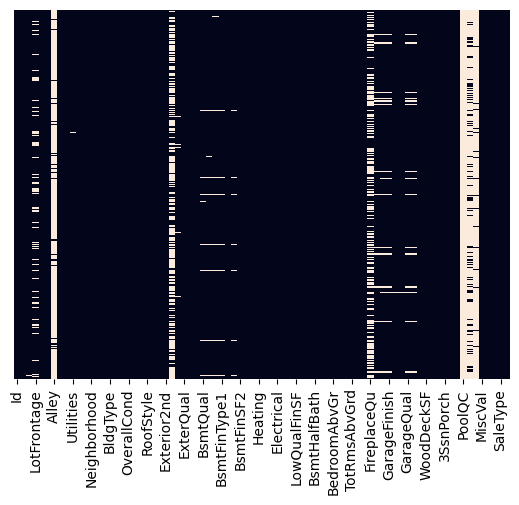

In [376]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False)

<Axes: >

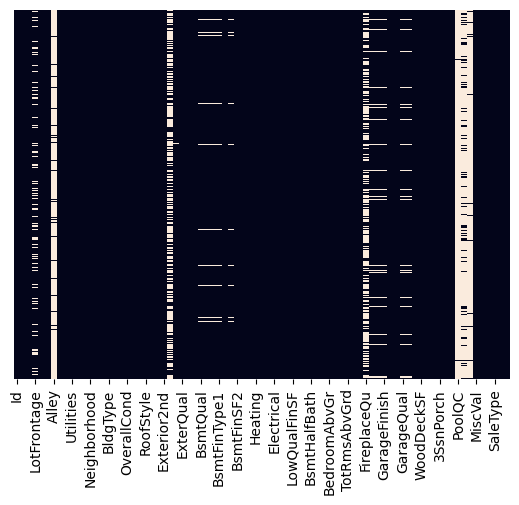

In [377]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [378]:
# check which columns have missing values in the test data
df.loc[:, df.isnull().any()].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [379]:
# handle missing for training data
df.drop(['Id'], axis=1, inplace=True)

# fill lot frontage with mean lot frontage
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

# since we have so few houses with alleys, we drop them
df.drop(['Alley'], axis=1, inplace=True)
category_cols.remove('Alley')


# usually built at the same time as the house (minimal impact)
df.drop(['GarageYrBlt'], axis=1, inplace=True)
numeric_cols.remove('GarageYrBlt')


# we have so few PoolQC, Fence and MiscFeature that it's not worth keeping in here
df.drop(['PoolQC','Fence','MiscFeature'], axis=1, inplace=True)
category_cols.remove('PoolQC')
category_cols.remove('Fence')
category_cols.remove('MiscFeature')



# these are categorical so we can't do an average. So the mode is the next best thing
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

# mode instead of average since Areas are often standard
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

df.dropna(inplace=True) # should be only one row dropped
df.shape

(1459, 75)

In [380]:
# check which columns have missing values in the test data
test_df.loc[:, test_df.isnull().any()].head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,80.0,NaN,AllPub,VinylSd,VinylSd,NaN,0.0,TA,TA,...,1961.0,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN,WD
1,RL,81.0,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,...,1958.0,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2,WD
2,RL,74.0,NaN,AllPub,VinylSd,VinylSd,NaN,0.0,Gd,TA,...,1997.0,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN,WD
3,RL,78.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,20.0,TA,TA,...,1998.0,Fin,2.0,470.0,TA,TA,NaN,NaN,NaN,WD
4,RL,43.0,NaN,AllPub,HdBoard,HdBoard,NaN,0.0,Gd,TA,...,1992.0,RFn,2.0,506.0,TA,TA,NaN,NaN,NaN,WD


In [381]:
# handle missing for test data
test_df.drop(['Id'], axis=1, inplace=True)

# fill lot frontage with mean lot frontage
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())

# since we have so few houses with alleys, we drop them
test_df.drop(['Alley'], axis=1, inplace=True)


# usually built at the same time as the house (minimal impact)
test_df.drop(['GarageYrBlt'], axis=1, inplace=True)


# we have so few PoolQC, Fence and MiscFeature that it's not worth keeping in here
test_df.drop(['PoolQC','Fence','MiscFeature'], axis=1, inplace=True)


# these are categorical so we can't do an average. So the mode is the next best thing
test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
test_df['BsmtCond'] = test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual'] = test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType'] = test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageFinish'] = test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual'] = test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond'] = test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['MasVnrType'] = test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional'] = test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['Utilities'] = test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])

# mode instead of average since Areas are often standard
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])
test_df.shape

(1459, 74)

### Handle Categorical

In [382]:
def category_onehot(df, cols):
    df_final = df

    i = 0
    for field in cols:
        df1 = pd.get_dummies(df[field], drop_first=True)
        # remove used fields to replace them with new encoded ones
        df.drop([field], axis=1, inplace=True)

        if i == 0:
            df_final = df.copy()
        else:
            df_final = pd.concat([df_final, df1], axis=1)

        i += 1

    df = pd.concat([df_final, df], axis=1)

    return df